### Prevendo quais passageiros tem chances de sobreviver ao desastre do Titanic.

In [41]:
# Importando os módulos
import pandas as pd                 
import matplotlib.pyplot as plt    
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
imputer = SimpleImputer( strategy='mean')
%matplotlib inline 

In [26]:
# Carregando o dataset
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [27]:
# Verificando as primeiras linhas do dataset
train.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# Verificando as primeiras linhas do dataset
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [29]:
# Identificando a correlação entre as variáveis
def plot_corr(train, size=10):
    corr = train.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)

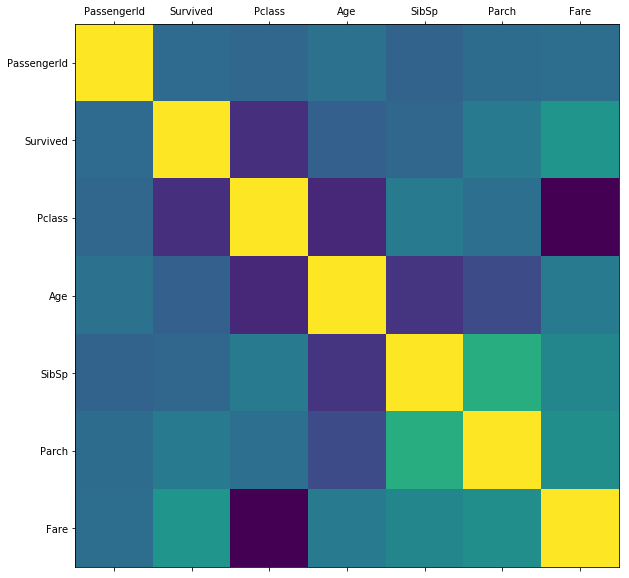

In [30]:
# Criando o gráfico
plot_corr(train)

In [31]:
# Visualizando a correlação em tabela
# Coeficiente de correlação: 
# +1  = forte correlação positiva
# 0   = não há correlação
# -1  = forte correlação negativa

train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


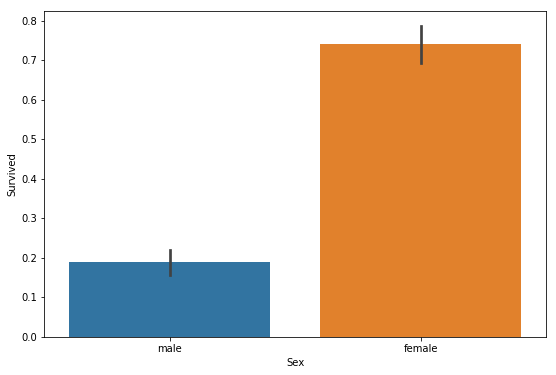

In [32]:
# Distribuição por sexo

plt.figure(figsize = (9,6))
sns.barplot(x = 'Sex', y = 'Survived', data=train)

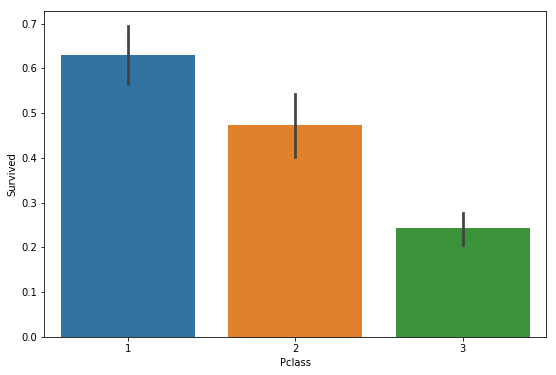

In [33]:
# Distribuição de sobrevivente por classe

plt.figure(figsize = (9,6))
sns.barplot(x='Pclass', y='Survived', data=train)

In [34]:
# Verificando valores nulos

train.isnull().values.any()


True

In [36]:
# Verificando em quais colunas possui valores nulos

train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Embarked         2
dtype: int64

In [35]:
# Removendo colunas

train.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [42]:
# Separando os dataset das colunas não numéricas
train_numerico = train.drop(['Sex','Embarked'], axis=1)
test_numerico = test.drop(['Sex','Embarked'], axis=1)

In [43]:
imputer.fit(train_numerico)

SimpleImputer(copy=True, fill_value=None, missing_values=nan, strategy='mean',
       verbose=0)

In [44]:
# Preencher os valores que estão nulos
train_no_null = imputer.transform(train_numerico)

In [45]:
# Preencher os valores que estão nulos
imputer.fit(test_numerico)
test_no_null = imputer.transform(test_numerico)

In [47]:
# Tranformação em dataframe
train_tr = pd.DataFrame(train_no_null, columns=train_numerico.columns)
test_tr = pd.DataFrame(test_no_null, columns=test_numerico.columns)

In [51]:
# Verificando valores nulos
train_tr.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [53]:
# Transformanado em categoria
train_cat = train[['Sex', 'Embarked']]
test_cat = test[['Sex', 'Embarked']]

In [54]:
train_cat_encoded = pd.get_dummies(train_cat)
test_cat_encoded = pd.get_dummies(test_cat)

In [55]:
train_cat_encoded.head()

,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,1,0,0,1
1,1,0,1,0,0
2,1,0,0,0,1
3,1,0,0,0,1
4,0,1,0,0,1


In [56]:
# Juntando os dados
new_train = train_tr.join(train_cat_encoded)
new_test = test_tr.join(test_cat_encoded)

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
# Seleção de variáveis preditoras
atributos = new_train.drop(['Survived', 'PassengerId'], axis=1)

In [59]:
# Variável a ser prevista
atrib_prev = train["Survived"]

In [60]:
# Definindo a taxa de split
split_test_size = 0.30

In [61]:
# Criando dados de treino e de teste
X_treino, X_teste, Y_treino, Y_teste = train_test_split(atributos, atrib_prev, test_size = split_test_size, random_state = 42)

In [65]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(X_treino)/len(atributos.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(X_teste)/len(atrib_prev.index)) * 100))

69.92% nos dados de treino
30.08% nos dados de teste


In [66]:
# Utilizando um classificador Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [67]:
# Criando o modelo preditivo
modelo_v1 = GaussianNB()

In [68]:
# Treinando o modelo
modelo_v1.fit(X_treino, Y_treino.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)

In [69]:
# Verificando exatidão nos dados de treino
from sklearn import metrics

In [70]:
nb_predict_train = modelo_v1.predict(X_treino)

In [71]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_treino, nb_predict_train)))
print()

Exatidão (Accuracy): 0.7945



In [72]:
# Verificando exatidão nos dados de teste
nb_predict_test = modelo_v1.predict(X_teste)

In [73]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, nb_predict_test)))
print()

Exatidão (Accuracy): 0.7910



In [74]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(Y_teste, nb_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(Y_teste, nb_predict_test, labels = [1, 0]))

Confusion Matrix
[[ 86  25]
 [ 31 126]]

Classification Report
              precision    recall  f1-score   support

           1       0.74      0.77      0.75       111
           0       0.83      0.80      0.82       157

   micro avg       0.79      0.79      0.79       268
   macro avg       0.78      0.79      0.79       268
weighted avg       0.79      0.79      0.79       268



In [77]:
# Regressão logistica

from sklearn.linear_model import LogisticRegression

In [78]:
# Versão do modelo usando Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(X_treino, Y_treino.ravel())
lr_predict_test = modelo_v3.predict(X_teste)

C:\Users\rita-\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [79]:
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(Y_teste, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(Y_teste, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): 0.8022

Classification Report
              precision    recall  f1-score   support

           1       0.79      0.71      0.75       111
           0       0.81      0.87      0.84       157

   micro avg       0.80      0.80      0.80       268
   macro avg       0.80      0.79      0.79       268
weighted avg       0.80      0.80      0.80       268



In [80]:
# Previsão com dados de treino
import pickle

In [81]:
# Salvando o modelo
filename = 'modelo_treinado_v3.sav'
pickle.dump(modelo_v3, open(filename, 'wb'))

In [82]:
X_teste

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
709,3.0,29.699118,1.0,1.0,15.2458,0,1,1,0,0
439,2.0,31.000000,0.0,0.0,10.5000,0,1,0,0,1
840,3.0,20.000000,0.0,0.0,7.9250,0,1,0,0,1
720,2.0,6.000000,0.0,1.0,33.0000,1,0,0,0,1
39,3.0,14.000000,1.0,0.0,11.2417,1,0,1,0,0
290,1.0,26.000000,0.0,0.0,78.8500,1,0,0,0,1
300,3.0,29.699118,0.0,0.0,7.7500,1,0,0,1,0
333,3.0,16.000000,2.0,0.0,18.0000,0,1,0,0,1
208,3.0,16.000000,0.0,0.0,7.7500,1,0,0,1,0
136,1.0,19.000000,0.0,2.0,26.2833,1,0,0,0,1


In [86]:
# Arvore de decisão

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
decisiontree = DecisionTreeClassifier()
decisiontree.fit(X_treino, Y_treino)
y_pred = decisiontree.predict(X_teste)
acc_decisiontree = round(accuracy_score(y_pred, Y_teste) * 100, 2)
print(acc_decisiontree)

76.12


In [87]:
# Algoritmo gradiente

from sklearn.ensemble import GradientBoostingClassifier
gbk = GradientBoostingClassifier()
gbk.fit(X_treino, Y_treino)
y_pred = gbk.predict(X_teste)
acc_gbk = round(accuracy_score(y_pred, Y_teste) * 100, 2)
print(acc_gbk)

80.22


In [88]:
ids = test['PassengerId']
predictions = gbk.predict(new_test.drop('PassengerId', axis=1))

In [89]:
submission = pd.DataFrame({ 'PassengerId' : ids, 'Survived': predictions.astype('int64') })
submission.to_csv('submission.csv', index=False)